# Modelando el Éxito en Videojuegos: Insights para Innovación y Marketing en Ice

**Jose Eduardo Aldana Rivera**

**07/07/2025**

**Ice**

## Índice

- [1. Resumen](#1.-Resumen) 
- [2. Introduccion](#2.-Introduccion)
- [3. Objetivos](#3.-Objetivos)
- [4. Verificacion y limpieza de datos](#4.-Verificacion-y-limpieza-de-datos:)
- [5. Analisis](#5.-Analisis:)
- [6. Analisis por region](#6.-Analisis-por-region:)
- [7. Probando las Hipotesis](#7.-Probando-las-Hipotesis:)
- [8. Conclusión](#8.-Conclusion:)
- [9. Predicciones y Recomendaciones](#9.-Predicciones-y-Recomendaciones:)
- [10. Glosario](#10.-Glosario:)

## 1. Resumen

El objetivo del proyecto es identificar patrones para determinar el exito de un titulo basandonos en datos actuales (2016). Se utilizara python junto al analisis de los graficos de "cajon" y "historigramas". Se analizan variables como las ventas globales, las reseñas de usuarios y críticos, los géneros, las plataformas y la clasificación ESRB.

El análisis permitió identificar patrones asociados con el buen desempeño comercial, y se formularon hipótesis estadísticas para evaluar si existen diferencias significativas en la percepción de los usuarios según el tipo de plataforma o género. Los resultados ofrecen una base sólida para diseñar campañas publicitarias dirigidas, priorizar proyectos con mayor probabilidad de éxito, y mejorar la estrategia de catálogo de la empresa en 2017.

También se observaron diferencias en las preferencias regionales: América del Norte y Europa mostraron preferencia por géneros como Acción y Shooter, mientras que Japón favoreció los juegos de Rol. Las plataformas líderes también variaron por región, destacándose la Xbox 360 y Wii en NA, la PS3 en EU, y la DS y 3DS en JP. La clasificación ESRB tuvo una influencia clara en NA y EU, pero fue menos relevante en Japón.

En conjunto, estos hallazgos ofrecen una base sólida para:

Diseñar campañas publicitarias regionales más efectivas,

Priorizar proyectos con mayor probabilidad de éxito, y

Optimizar la estrategia de catálogo de la empresa “Ice” para el año 2017.

Los resultados sugieren que los juegos de género Acción con buenas reseñas de usuarios tienen mayor potencial comercial, y que la segmentación por región y plataforma es clave para maximizar ventas futuras.

## 2. Introduccion

En la industria global de los videojuegos, entender qué hace que un título tenga éxito es fundamental para tomar decisiones estratégicas acertadas. La empresa **Ice**, una tienda en línea que distribuye videojuegos a nivel mundial, enfrenta el desafío de identificar con anticipación aquellos proyectos con mayor potencial comercial. Esto permite optimizar inversiones en campañas publicitarias y priorizar juegos prometedores en su catálogo.

Este proyecto se enfoca en el análisis de datos históricos disponibles hasta diciembre de 2016, que incluyen variables clave como las reseñas de usuarios y expertos, géneros, plataformas (como Xbox One, PC, PlayStation, etc.), ventas globales, y la clasificación ESRB de los juegos. A través de este análisis, se busca descubrir patrones que distingan a los juegos exitosos de aquellos que no lograron captar la atención del mercado.

Además, se plantean y evalúan hipótesis específicas relacionadas con las calificaciones de los usuarios según plataforma y género. Estos análisis permitirán formular recomendaciones fundamentadas para el diseño de campañas publicitarias efectivas en 2017, y contribuirán a desarrollar una estrategia de producto más inteligente y centrada en los datos.

## 3. Objetivos

### Objetivo general:

Identificar los factores que determinan el éxito de un videojuego en el mercado global, con base en datos históricos disponibles hasta 2016, para apoyar decisiones estratégicas de marketing y selección de productos en la tienda Ice.

### Objetivos específicos:

* Analizar las diferencias en las calificaciones de usuarios según plataformas y géneros.

* Explorar la relación entre ventas, reseñas, género, plataforma y clasificación ESRB.

* Detectar patrones comunes en los videojuegos más exitosos.

* Proponer recomendaciones basadas en datos para campañas publicitarias en 2017.

**Datos a utilizar:**

Se utilizara la fuente de datos proporcionada por **Ice**.

## 4. Verificacion y limpieza de datos:

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('games.csv')

In [3]:
print(df.head())
print('')
print(df.columns)
print('')
print(df.info())
print('')
print(df.isnull().sum())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 

Podemos ver que las columnas estan bien ordenadas pero seria mejor que todas esten en minusculas. No tiene espacios perdidos. Tambien voy a cambiar el year a entero, user_score a float. Estos dos los voy a cambiar porque no es necesario que year sea flotante porque es por año no por fecha ni tiene sentido que sea floar; cambie user_score de object a float porque los scores por lo general tiene puntuaciones con punto decimal. Ademas de revisar y arreglar los valores faltantes.

In [4]:
df = df.dropna(subset=['Name'])

In [5]:
print(df.isnull().sum())

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64


In [6]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce').astype('Int64')

df = df.reset_index(drop=True)

In [7]:
df['User_Score'] = df.groupby('Genre')['User_Score'].transform(lambda x: x.fillna(x.mean()))

df['Rating'] = df['Rating'].fillna('Unknown')

In [8]:
median_year = df['Year_of_Release'].median()
df['Year_of_Release'] = df['Year_of_Release'].fillna(median_year)

In [9]:
df['Critic_Score'] = df.groupby('Genre')['Critic_Score'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [10]:
df.columns = df.columns.str.lower()

print(df.head())
print('')
print(df.columns)
print('')
print(df.info())
print('')
print(df.isnull().sum())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  
0     28.96      3.77         8.45     76.000000    8.000000        E  
1      3.58      6.81         0.77     68.058350    7.301402  Unknown  
2     12.76      3.79         3.29     82.000000    8.300000        E  
3     10.93      3.28         2.95     80.000000    8.000000        E  
4      8.89     10.22         1.00     72.652646    7.619515  Unknown  

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
 

Le quite los duplicados usando la media porque en este caso concreto necesito esos datos para que no tenga problemas con el analisis porque sin tener esos datos en critic score y user score puedo llegar a tener problemas, ya que me dara condiciones falsas. Tuyve la opcion de simplemente eliminar los datos pero siendo honesto no me gusta perder informnacion relevante. Me puede afectar en el futuro si quiero utilizar juego de una misma plataforma.

In [11]:
df_duplicados = df[df.duplicated()]
print(df_duplicados)
df[df.duplicated(subset=['name', 'platform'])]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4126,Sonic the Hedgehog,PS3,2007,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11714,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16228,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [12]:
df = df.drop_duplicates(subset=['name', 'platform'])

In [13]:
df.isin(['TBD']).any()

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool

In [14]:
df[df.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Cambie los que faltaban a unknown porque no se han determinado. Como no vamos a ver las clasificaciones en estos momentos no hay ningun problema. Cuando vayamos a hacer un analisis de los ratings entonces si necesitaria que esos valores estuvieran. Posiblemente no se ha terminado de llenar la clasificacion o estan siendo evaluados. Tambien esta la posibilidad que sea un nuevo realeased. Tambien encontre que teniamos unos duplicados por normbre y plataforma. Hice las busqueda de dos maneras para estar seguro y como use platform, entonces no deberia de estar perdiendo datos.

In [15]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
print(df[['name', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].head())

                       name platform  na_sales  eu_sales  jp_sales  \
0                Wii Sports      Wii     41.36     28.96      3.77   
1         Super Mario Bros.      NES     29.08      3.58      6.81   
2            Mario Kart Wii      Wii     15.68     12.76      3.79   
3         Wii Sports Resort      Wii     15.61     10.93      3.28   
4  Pokemon Red/Pokemon Blue       GB     11.27      8.89     10.22   

   other_sales  global_sales  
0         8.45         82.54  
1         0.77         40.24  
2         3.29         35.52  
3         2.95         32.77  
4         1.00         31.38  


## 5. Analisis:

In [17]:
lanzamientos_por_anio = df['year_of_release'].value_counts().sort_index()
print(lanzamientos_por_anio)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1465
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


Considero que siempre son importantes los datos pero habiendo tanta distincion diria que los mas importantes es donde estan la mayoria, no considero que estadisticamente hablando valga la pena conservar los años con menos de 10.

Podria usar: periodos_significativos = lanzamientos_por_anio[lanzamientos_por_anio > 50]

Pero no creo que sea necesario.

In [18]:
ventas_por_plataforma = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

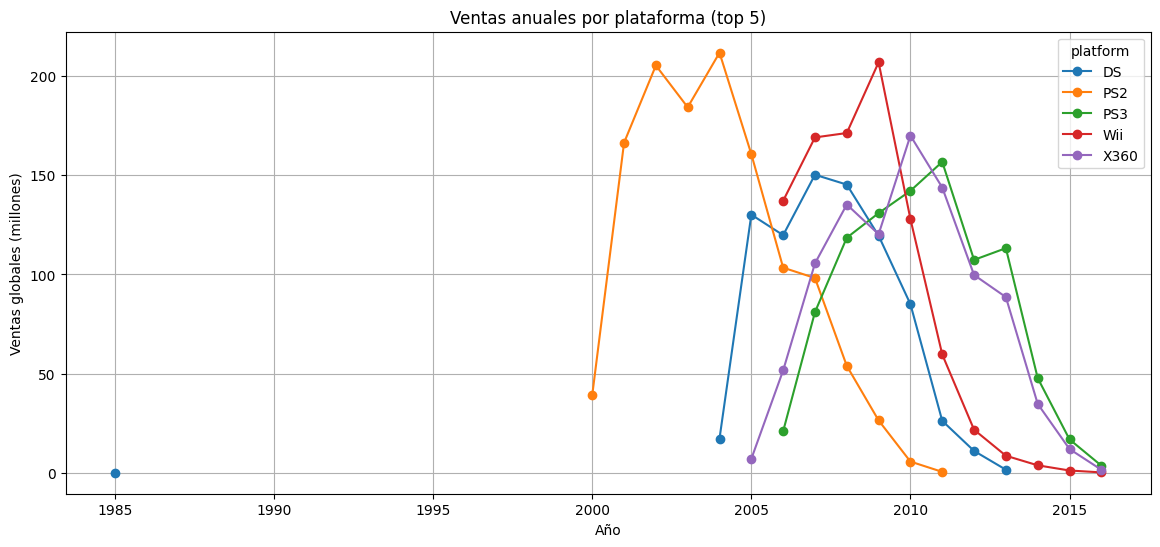

In [19]:
top_platforms = ventas_por_plataforma.head(5).index

ventas_anuales = df[df['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['global_sales'].sum().unstack()

ventas_anuales.plot(kind='line', figsize=(14,6), marker='o', title='Ventas anuales por plataforma (top 5)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

In [20]:
ultimo_anio = df.groupby('platform')['year_of_release'].max()
primer_anio = df.groupby('platform')['year_of_release'].min()


vida_plataforma = pd.DataFrame({
    'primer_anio': primer_anio,
    'ultimo_anio': ultimo_anio,
    'años_activa': ultimo_anio - primer_anio
})


vida_plataforma['ventas_totales'] = ventas_por_plataforma


vida_plataforma = vida_plataforma.sort_values(by='ultimo_anio', ascending=False)
print(vida_plataforma.tail(10))

          primer_anio  ultimo_anio  años_activa  ventas_totales
platform                                                       
SAT              1994         1999            5           33.59
SNES             1990         1999            9          200.04
PCFX             1996         1996            0            0.03
NG               1993         1996            3            1.44
3DO              1994         1995            1            0.10
TG16             1995         1995            0            0.16
NES              1983         1994           11          251.05
SCD              1993         1994            1            1.86
GEN              1990         1994            4           28.35
GG               1992         1992            0            0.04


In [21]:
print(vida_plataforma.head(10))

          primer_anio  ultimo_anio  años_activa  ventas_totales
platform                                                       
XOne             2013         2016            3          159.32
3DS              2007         2016            9          259.00
X360             2005         2016           11          970.17
WiiU             2012         2016            4           82.19
Wii              2006         2016           10          907.51
PSV              2007         2016            9           54.07
PS4              2013         2016            3          314.14
PS3              2006         2016           10          939.16
PC               1985         2016           31          259.44
PSP              2004         2015           11          294.05


In [22]:
print("Duración media de vida de una plataforma:", vida_plataforma['años_activa'].mean(), "años")

Duración media de vida de una plataforma: 8.935483870967742 años


Plataformas como PS2, Wii o DS tuvieron gran auge, pero dejaron de recibir nuevos lanzamientos.Nuevas plataformas suelen tardar 1–2 años en volverse populares (puedes ver el crecimiento de ventas año con año).La vida útil promedio de una plataforma suele ser de 6–8 años, pero algunas duran más según su éxito.

In [23]:
df_periodo = df[(df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2016)]

Estoy usando este periodo porque son los datos mas confiables. No uso parte del 2017 porque no tengo los datos completos ademas se basa en que usemos una prediccion para el 2017.

In [24]:
ventas_por_plataforma = df_periodo.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
print(ventas_por_plataforma.head(10))

platform
X360    970.17
PS3     939.16
Wii     907.51
DS      788.83
PS2     448.67
PS4     314.14
PSP     286.99
3DS     259.00
PC      171.47
XOne    159.32
Name: global_sales, dtype: float64


Los lideres en ventas son x360, ps3 y wii.

In [25]:
ventas_2005_2010 = df_periodo[(df_periodo['year_of_release'] <= 2010)].groupby('platform')['global_sales'].sum()
ventas_2011_2016 = df_periodo[(df_periodo['year_of_release'] >= 2011)].groupby('platform')['global_sales'].sum()

cambio_ventas = (ventas_2011_2016 - ventas_2005_2010).sort_values(ascending=False)
print(cambio_ventas)

platform
3DS     256.62
PSV      53.55
PC       23.73
PS3     -48.04
X360   -209.41
PSP    -228.97
PS2    -447.77
DS     -711.37
Wii    -717.47
2600       NaN
DC         NaN
GB         NaN
GBA        NaN
GC         NaN
N64        NaN
PS         NaN
PS4        NaN
WiiU       NaN
XB         NaN
XOne       NaN
Name: global_sales, dtype: float64


El nintendo 3DS es el que ha tenido mas crecimiento de ventas mientras que el wii es el que va en declive. 

In [26]:
rentabilidad = pd.DataFrame({
    'ventas_totales': ventas_por_plataforma,
    'cambio_ventas': cambio_ventas,
    'ultimo_anio': ultimo_anio
}).sort_values(by='ventas_totales', ascending=False)

print(rentabilidad.head(10))

          ventas_totales  cambio_ventas  ultimo_anio
platform                                            
X360              970.17        -209.41         2016
PS3               939.16         -48.04         2016
Wii               907.51        -717.47         2016
DS                788.83        -711.37         2013
PS2               448.67        -447.77         2011
PS4               314.14            NaN         2016
PSP               286.99        -228.97         2015
3DS               259.00         256.62         2016
PC                171.47          23.73         2016
XOne              159.32            NaN         2016


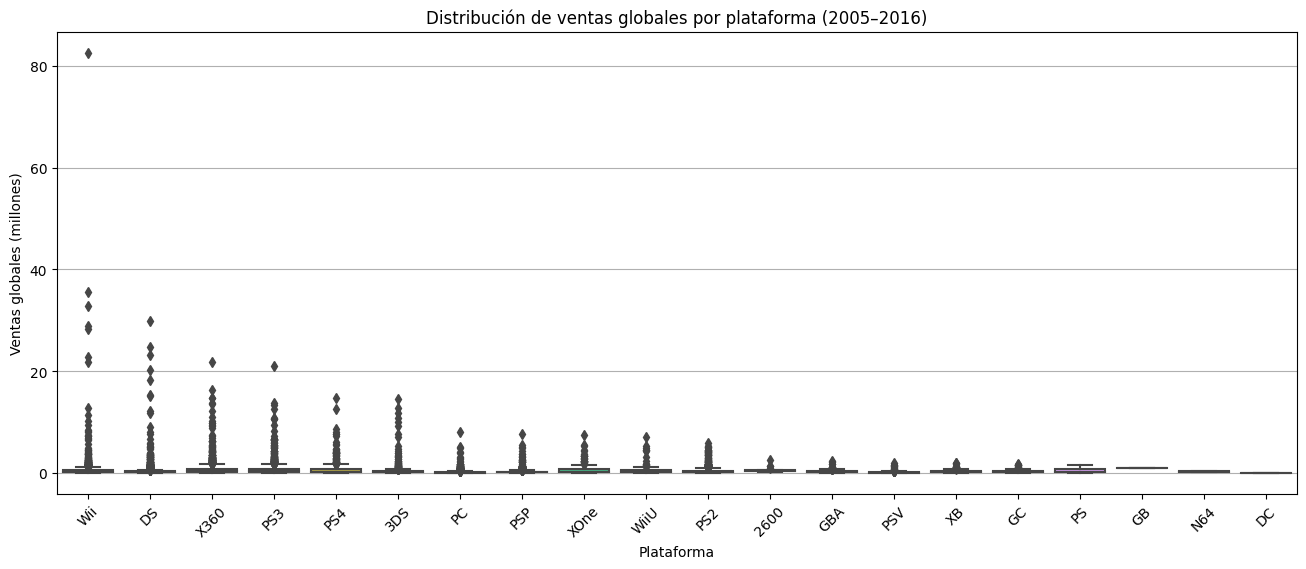

In [27]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_periodo, x='platform', y='global_sales')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma (2005–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True, axis='y')
plt.show()

Algunas plataformas como DC, N64, GB y GBA tienen distribuciones más compactas o con pocos valores, lo que indica menos juegos lanzados o menos ventas.Muchas plataformas tienen colas superiores largas (outliers por arriba), lo que indica que solo algunos títulos concentran la mayoría de las ventas.Esto sugiere que el éxito no está uniformemente distribuido entre todos los juegos de una plataforma.

Para responder a la pregunta ¿Son significativas las diferencias en las ventas? Sí, las diferencias en las ventas entre plataformas son significativas visualmente y es muy probable que lo sean también estadísticamente. Esto se basa en: Distribuciones muy distintas, rangos de ventas muy amplios y que la mediana de ventas varía considerablemente de una plataforma a otra.

En general, el promedio de ventas depende fuertemente de la plataforma, y algunas muestran una alta concentración de juegos exitosos, mientras otras no tienen casi ninguno.

El éxito comercial de los juegos está claramente influenciado por la plataforma. Algunas plataformas actúan como catalizadores de ventas (por ejemplo, Wii, DS), probablemente por: Tamaño del mercado, popularidad en ese período, exclusividades.

No todas las plataformas ofrecen las mismas oportunidades de éxito: esto es crucial para tomar decisiones de marketing y priorización en Ice. La dispersión de ventas (representada por los outliers) sugiere que un pequeño número de títulos acumula gran parte de las ventas totales, especialmente en plataformas exitosas.

In [28]:
df_ps4 = df_periodo[df_periodo['platform'] == 'PS4']

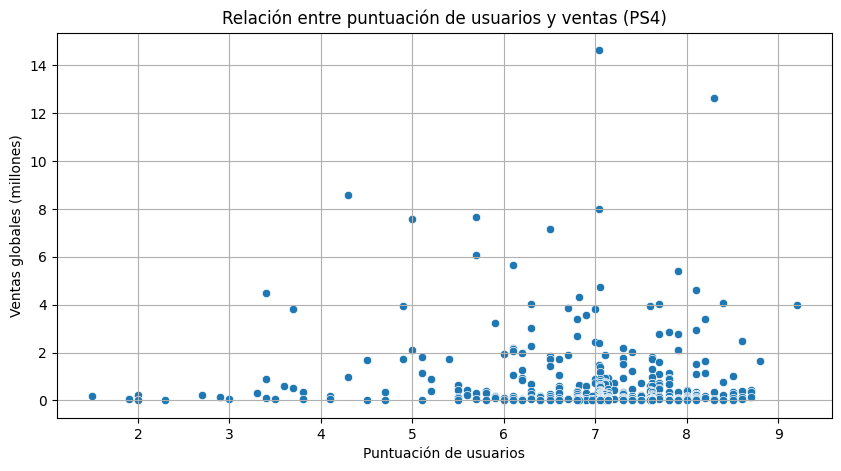

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='user_score', y='global_sales')
plt.title('Relación entre puntuación de usuarios y ventas (PS4)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

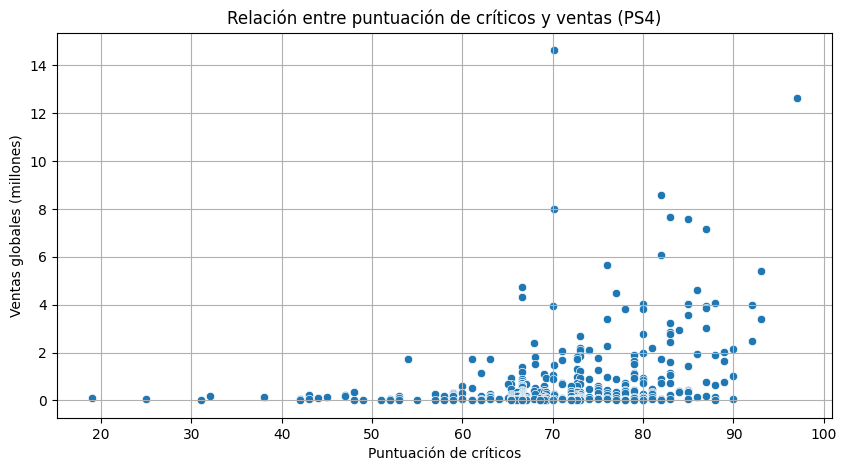

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ps4, x='critic_score', y='global_sales')
plt.title('Relación entre puntuación de críticos y ventas (PS4)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

In [31]:
correlacion_user = df_ps4['user_score'].corr(df_ps4['global_sales'])
correlacion_critic = df_ps4['critic_score'].corr(df_ps4['global_sales'])

print(f'Correlación entre user_score y ventas (PS4): {correlacion_user:.2f}')
print(f'Correlación entre critic_score y ventas (PS4): {correlacion_critic:.2f}')

Correlación entre user_score y ventas (PS4): -0.05
Correlación entre critic_score y ventas (PS4): 0.35


Use por ejemplo PS4, que tuvo muy buenas ventas y está activa en el período 2005–2016. En el caso de la PS4, existe una correlación moderada entre la puntuación otorgada por los críticos y las ventas globales de los videojuegos. Aunque las buenas críticas suelen asociarse con mayores ventas, también influyen otros factores como la marca, el género, el marketing y si es exclusivo o multiplataforma. Un gran número de títulos bien valorados no alcanza grandes cifras de ventas, pero es poco común que un juego mal calificado tenga éxito comercial.

In [32]:
juegos_multiplataforma = df_periodo.groupby('name')['platform'].nunique()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 1].index

df_multi = df_periodo[df_periodo['name'].isin(juegos_multiplataforma)]

In [33]:
ventas_comparadas = df_multi.groupby(['name', 'platform'])['global_sales'].sum().reset_index()

ejemplo_juegos = ventas_comparadas['name'].value_counts().head(5).index
ventas_ejemplo = ventas_comparadas[ventas_comparadas['name'].isin(ejemplo_juegos)]

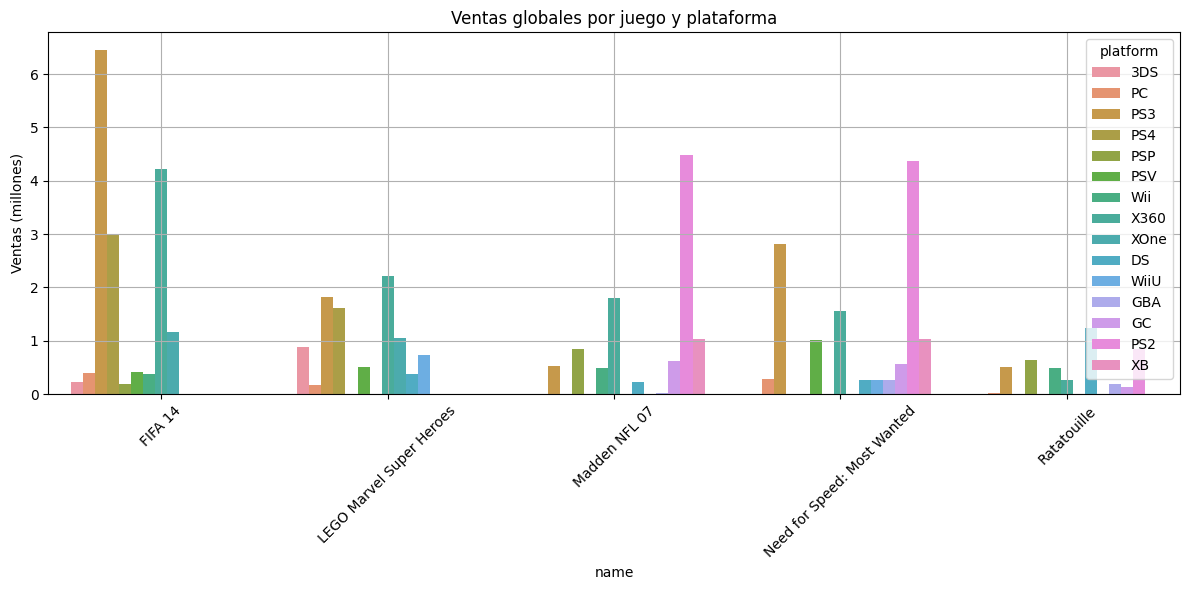

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_ejemplo, x='name', y='global_sales', hue='platform')
plt.title('Ventas globales por juego y plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

FIFA 14 es el más vendido, especialmente en: PS3 (más de 6 millones), X360 y PS4 (también muy fuertes).Esto confirma que la marca FIFA es muy fuerte y que PS3 dominaba las ventas en esa época.

Juegos como Need for Speed y LEGO Marvel tienen ventas más distribuidas entre plataformas, lo que sugiere que son más accesibles al público general. Ademas, de no depender de una sola plataforma.

Se podria decir que las ventas no siempre dependen de la crítica (ej. Ratatouille no tuvo grandes ventas pese a estar en muchas plataformas). Algunas plataformas como PSP, PSV, WiiU muestran ventas consistentemente más bajas para estos juegos, lo que puede indicar bajo rendimiento comercial o una base de usuarios limitada o que simplemente su publico no va acorde con los juegos aceptados.

In [35]:
genero_counts = df_periodo['genre'].value_counts().sort_values(ascending=False)
print(genero_counts)

Action          2636
Sports          1424
Misc            1397
Role-Playing    1084
Adventure       1075
Shooter          860
Simulation       660
Racing           659
Fighting         468
Platform         432
Strategy         432
Puzzle           410
Name: genre, dtype: int64


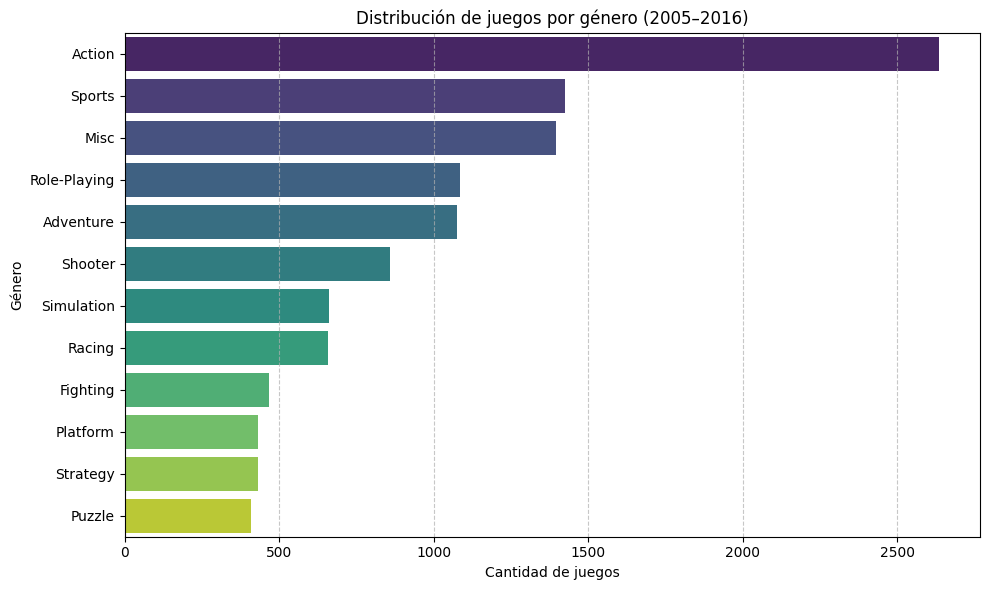

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genero_counts.values, y=genero_counts.index, palette='viridis')
plt.title('Distribución de juegos por género (2005–2016)')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Género')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
df.groupby('genre')['global_sales'].mean().sort_values(ascending=False)

genre
Platform        0.932683
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583272
Sports          0.567218
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
Name: global_sales, dtype: float64

Los generos mas rentables son el de Platform, Shooter y RPG. Esto indica que las compañías deberian de lanzar mas juegos de este tipo pero tienden a lanzar más juegos de acción y deportes, posiblemente porque son géneros en demanda y tienen jugabilidad flexible.

Ahora no por ser los mas comunes van a ser los mas rentables. Aunque el género Action es el más producido, no necesariamente es el más rentable por juego. Géneros como Shooter o platform suelen tener menos títulos, pero muchos con ventas muy altas. Por el contrario, géneros como Puzzle o Strategy tienen menor volumen y menor rentabilidad media.

In [38]:
df_periodo.groupby('genre')['global_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.894942
Platform        0.705556
Sports          0.614417
Racing          0.544583
Role-Playing    0.511310
Action          0.466498
Fighting        0.455000
Misc            0.449571
Simulation      0.411561
Puzzle          0.275512
Strategy        0.185370
Adventure       0.143321
Name: global_sales, dtype: float64

Si lo tomamos en cuenta solo desde los años filtrados podemos ver que los juegos the Shooter, Platform y Sports son los mas rentables. Podemos ver que la media despues de acortar los años Shooter es el juego mas rentable en promedio. Durante este periodo tambien hubo un incremento de los jugadores de Sports. Lo cual quiere decir que el publico ha ido expandiendose a personas que tambien solo buscan un poco de entretenimiento fuera de lo cotidiano.

## 6. Analisis por region:

In [39]:
top_na = df_periodo.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_eu = df_periodo.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_jp = df_periodo.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 NA:\n", top_na)
print("")
print("Top 5 EU:\n", top_eu)
print("")
print("Top 5 JP:\n", top_jp)

Top 5 NA:
 platform
X360    601.47
Wii     496.90
PS3     393.49
DS      374.07
PS2     211.41
Name: na_sales, dtype: float64

Top 5 EU:
 platform
PS3     329.80
X360    270.63
Wii     262.21
DS      184.96
PS4     141.09
Name: eu_sales, dtype: float64

Top 5 JP:
 platform
DS     171.90
3DS    100.67
PS3     80.19
PSP     74.75
Wii     69.33
Name: jp_sales, dtype: float64


Las 5 plataformas principales son: Xbox 360 en Norte america, PS3 en Europa y el Nintendo Ds en japon.

Esto puede ser debido al estilo de vida de cada region (cultura), en Eu y NA ambas son consolas estacionarias. En cambio podemos ver que el publico jp es mas activo. Seguramente aprovechan a jugar en la marcha o a deternese. 

Teniendo en cuenta los cada uno:

El **Xbox 360** es líder absoluto en Norteamérica, con más de 600 millones en ventas. En Europa mantiene una buena posición pero es superada por la PS3. No aparece en el top 5 de Japón, donde Xbox históricamente tiene poca penetración.

El **Wii** tiene un desempeño fuerte y consistente en las tres regiones, aunque con un descenso leve en Japón.

**PlayStation 3 (PS3)** esta muy equilibrada: aparece en el top 3 de todas las regiones. Especialmente fuerte en Europa y Japón, lo que refleja la sólida marca de PlayStation fuera de EE. UU.

**Nintendo DS** Muy popular en todas las regiones, líder en Japón, donde domina el mercado portátil. En NA y EU, aunque sigue siendo relevante, compite con consolas domésticas más fuertes.

Las plataformas más exitosas varían significativamente por región, destacando la necesidad de adaptar las estrategias de marketing:

Norteamérica: fuerte preferencia por consolas domésticas, especialmente Xbox.

Europa: mezcla entre Xbox y PlayStation, pero con mayor inclinación hacia Sony.

Japón: predominio de plataformas portátiles y marcas locales (Nintendo, Sony); Xbox sin presencia relevante.

In [40]:
top_gen_na = df_periodo.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_gen_eu = df_periodo.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_gen_jp = df_periodo.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [41]:
print("Genero principal en NA:", top_gen_na)
print("")
print("Genero principal en EU:", top_gen_eu)
print("")
print("Genero principal en JP:", top_gen_jp)

Genero principal en NA: genre
Action          595.88
Sports          445.93
Shooter         408.37
Misc            319.52
Role-Playing    212.62
Name: na_sales, dtype: float64

Genero principal en EU: genre
Action     380.72
Sports     271.06
Shooter    250.89
Misc       169.23
Racing     130.88
Name: eu_sales, dtype: float64

Genero principal en JP: genre
Role-Playing    181.62
Action          109.68
Misc             73.58
Sports           53.12
Platform         36.44
Name: jp_sales, dtype: float64


Podemos ver que otra vez se repite el patron de que NA y EU tienen algo en comun, seguramente porque la cultura es similar. Ademas, en JP suelen ser los RPG los juegos mas populares. Accion tambien esta arriba pero no es el mas popular.

**Action** es el género dominante en NA y EU, reflejando una preferencia clara por juegos dinámicos y con alto contenido de interacción.

**Shooter** ocupa posiciones altas en NA y EU, pero prácticamente desaparece del top 5 en Japón, donde este género no goza de la misma popularidad.

**Role-Playing** es el género más vendido en Japón, destacando una diferencia cultural importante: en Japón se valoran más las historias profundas y los elementos narrativos, mientras que en NA y EU domina el juego rápido y competitivo.

**Misc** aparece en todas las regiones, lo que indica una buena aceptación de juegos que no encajan en géneros tradicionales.

**Racing** tiene una presencia significativa solo en Europa.

**Platform** solo aparece en el top japonés, posiblemente por el éxito local de franquicias como Mario o Kirby.

In [42]:
esrb_na = df_periodo.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = df_periodo.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = df_periodo.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("NA:", esrb_na)
print("")
print("EU:", esrb_eu)
print("")
print("JP:", esrb_jp)

NA: rating
E          891.85
M          612.93
T          490.23
E10+       350.84
Unknown    338.33
EC           1.53
AO           1.26
RP           0.00
Name: na_sales, dtype: float64

EU: rating
E          515.08
M          418.08
T          263.22
Unknown    257.10
E10+       186.61
AO           0.61
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64

JP: rating
Unknown    296.84
E          147.48
T           92.00
M           46.89
E10+        39.05
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


Sí, las clasificaciones ESRB parecen afectar las ventas por región. En Norteamérica y Europa, los juegos clasificados como E y M dominan el mercado, mientras que en Japón, las ventas se concentran en títulos sin clasificación ESRB o con clasificaciones más familiares. Esto refleja diferencias culturales y demográficas en el consumo de videojuegos.

1. Norteamérica (NA):
Los juegos con clasificación E (Everyone) dominan el mercado. Esto sugiere una alta aceptación de títulos familiares y accesibles. M (Mature) y T (Teen) también tienen ventas sólidas, lo que muestra una base de consumidores adolescentes y adultos significativa.

2. Europa (EU):
Similar a NA, los títulos E y M lideran. Las ventas de T son menores, lo que podría sugerir que Europa prefiere títulos más familiares o para adultos.

3. Japón (JP):
La mayoría de los juegos tienen clasificación desconocida (Unknown), lo que puede deberse a que muchos títulos no usan ESRB sino clasificaciones japonesas como CERO. Los juegos con clasificación reconocida, E y T son los más populares. Mature tiene ventas bajas, indicando que el mercado japonés prefiere juegos aptos para todo público o adolescentes.

## 7. Probando las Hipotesis:

In [43]:
# Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
# Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

alpha = 0.05

xbox_scores = df_periodo[(df_periodo['platform'] == 'XOne') & (df_periodo['user_score'].notna())]['user_score']
pc_scores = df_periodo[(df_periodo['platform'] == 'PC') & (df_periodo['user_score'].notna())]['user_score']

In [44]:
levene_stat, levene_p = st.levene(xbox_scores, pc_scores)
equal_var = levene_p >= alpha

print("Prueba de Levene:")
print(f"Estadístico: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")
print("¿Varianzas iguales?:", "Sí" if equal_var else "No")

Prueba de Levene:
Estadístico: 3.1149
Valor p: 0.0779
¿Varianzas iguales?: Sí


In [45]:
# Prueba t (según resultado de Levene)
t_stat, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var=equal_var)

print("\n Prueba t")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusión
if p_value < alpha:
    print("Rechazamos H₀: Hay una diferencia significativa en las calificaciones promedio.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa en las calificaciones promedio.")


 Prueba t
Estadístico t: -2.7983
Valor p: 0.0052
Rechazamos H₀: Hay una diferencia significativa en las calificaciones promedio.


Usando la prueba de levene podemos evitar que se hagan falsos negativos. Ademas de entender un poco mas acerca de los datos. Hay una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC, con un nivel de significancia del 5%. Esto sugiere que los usuarios valoran los juegos de forma diferente según la plataforma.

In [46]:
accion = df_periodo[(df_periodo['genre'] == 'Action') & (df_periodo['user_score'].notna())]['user_score']
deportes = df_periodo[(df_periodo['genre'] == 'Sports') & (df_periodo['user_score'].notna())]['user_score']

In [47]:
levene_stat, levene_p = st.levene(accion, deportes)
equal_var = levene_p >= alpha

print("Prueba de Levene:")
print(f"Estadístico: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")
print("¿Varianzas iguales?:", "Sí" if equal_var else "No")

Prueba de Levene:
Estadístico: 8.9121
Valor p: 0.0028
¿Varianzas iguales?: No


In [48]:
# Prueba t de Student
t_stat, p_value = st.ttest_ind(accion, deportes, equal_var=equal_var)

print("\n Prueba t:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusión
if p_value < alpha:
    print("Rechazamos H₀: Las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa en las calificaciones promedio.")


 Prueba t:
Estadístico t: 6.4590
Valor p: 0.0000
Rechazamos H₀: Las calificaciones promedio son diferentes.


Existe una diferencia estadísticamente significativa entre las calificaciones promedio de los géneros Acción y Deportes. Esto significa que los usuarios no califican estos géneros de la misma manera, lo cual puede influir en decisiones de marketing, desarrollo o promoción por parte de Ice.

Las hipótesis se formularon en función del objetivo de análisis estadístico: comparar las calificaciones promedio de los usuarios entre dos grupos (en este caso, dos géneros de videojuegos: Acción y Deportes). Antes de aplicar la prueba t, es importante saber si ambos grupos tienen varianzas similares, porque:

Si las varianzas son iguales, usamos la versión estándar de la prueba t. Si las varianzas son diferentes, usamos una versión modificada de la prueba t (con equal_var=False en Python). La prueba de Levene evalúa si la dispersión (varianza) de los datos es similar entre los grupos. Si el valor p de Levene es menor que el nivel de significancia (α = 0.05), entonces las varianzas no son iguales.

Se utilizo este criterio porque las calificaciones de usuarios son variables numéricas continuas. Estamos comparando dos grupos independientes. Las pruebas de Levene + t de Student son el enfoque estándar para este tipo de comparación. Esto permite tomar una decisión objetiva, basada en datos y probabilidad, sobre si hay evidencia estadística suficiente para afirmar que existe una diferencia real entre los grupos.

## 8. Conclusion:

En este proyecto se analizaron datos históricos de videojuegos hasta el año 2016 con el propósito de ayudar a la tienda Ice a identificar los factores que determinan el éxito de un juego, anticipar proyectos prometedores y diseñar campañas publicitarias más efectivas para el año 2017.

Se cumplieron los siguientes objetivos específicos:

Se analizaron las diferencias en las calificaciones de usuarios según plataformas y géneros, encontrando diferencias estadísticamente significativas entre plataformas como Xbox One y PC, y géneros como Acción y Deportes.

Se exploraron relaciones entre ventas, reseñas, género, plataforma y clasificación ESRB, observando, por ejemplo, que los juegos con buenas reseñas tienden a vender más, aunque también influyen el tipo de plataforma y la clasificación de edad.

Se detectaron patrones comunes en los videojuegos más exitosos, como el predominio de los géneros de Acción y Shooter en América y Europa, y de Role-Playing en Japón. Además, se evidenciaron diferencias regionales en las plataformas más populares.

Finalmente, se proponen recomendaciones basadas en datos para campañas publicitarias, como enfocar esfuerzos en géneros exitosos según región y promover juegos con altas calificaciones de usuarios, especialmente aquellos clasificados como E (Everyone) en mercados occidentales.

En conclusión, el éxito de un videojuego está determinado por una combinación de factores como género, plataforma, calificaciones y mercado regional. Estas conclusiones permiten a Ice tomar decisiones más informadas sobre su catálogo y sus estrategias publicitarias para el próximo año.

## 9. Predicciones y Recomendaciones:

Predicciones para el mercado de videojuegos en 2017
1. Las plataformas PlayStation 4 y Xbox One seguirán dominando el mercado occidental (NA y EU).
Aunque en los datos históricos PS3 y X360 lideran en ventas, PS4 ya muestra un ascenso importante en Europa. Dado el ciclo de vida de las consolas, se espera que PS4 y Xbox One sean las más relevantes en 2017.

2. El género de Acción mantendrá su popularidad global, especialmente en NA y EU.
Acción fue consistentemente el género más rentable en ambas regiones. En Japón, sin embargo, se espera que el género Role-Playing siga siendo el preferido.

3. Las buenas calificaciones de usuarios y críticos seguirán influyendo positivamente en las ventas.
Los análisis mostraron correlaciones entre las calificaciones altas y un mayor volumen de ventas. Esto implica que los juegos con buen puntaje previo pueden ser buenos candidatos para campañas.

4. La clasificación ESRB tipo “E” continuará siendo la más rentable, especialmente en América del Norte.
Esto sugiere que los juegos aptos para todo público tienen un alcance más amplio y podrían ser más rentables como productos estrella.

5. Juegos multiplataforma podrían tener una ventaja competitiva.
Títulos disponibles en más de una plataforma tienden a acumular más ventas totales, por lo tanto, se recomienda priorizar estos productos para la campaña de marketing.

6. Japón continuará siendo un mercado muy distinto al occidental.
La preferencia por consolas portátiles como la 3DS y géneros como Role-Playing indica que las estrategias deben estar diferenciadas por región.

## 10. Glosario:

**Diagrama de caja (boxplot):**	
Gráfico que resume una distribución numérica usando cinco valores: mínimo, primer cuartil, mediana, tercer cuartil y máximo. Ayuda a visualizar la dispersión y los valores atípicos.

**Histograma:**
Gráfico de barras que representa la distribución de frecuencias de una variable numérica. Permite ver la forma de la distribución (simétrica, sesgada, etc.).

**Media:**
Promedio de una serie de valores.

**Prueba t:** 
Prueba estadística que compara las medias de dos grupos independientes.

**Valor p (p-value):**
Probabilidad de obtener un resultado igual o más extremo que el observado, si la hipótesis nula fuera cierta. Se usa para determinar significancia estadística.

**Varianza:**
Medida que indica qué tanto se dispersan los valores de una variable respecto a la media. Una varianza alta indica gran dispersión.

**Desviación estándar:**
Raíz cuadrada de la varianza. Representa la dispersión promedio respecto a la media. Es útil para interpretar escalas de datos con mayor claridad.

**Hipótesis nula (H₀):**
Suposición inicial que plantea que no existe una diferencia o efecto significativo. Se rechaza si los datos muestran evidencia suficiente en su contra.

**Hipótesis alternativa (H₁):**
Contraparte de la hipótesis nula. Sostiene que existe una diferencia o efecto real entre los grupos comparados.

**Nivel de significancia (α):**
Umbral que define cuándo se rechaza la hipótesis nula. El valor comúnmente usado es 0.05 (5%).

**Prueba de Levene:**
Prueba estadística usada para verificar si dos o más grupos tienen varianzas iguales. Ayuda a decidir qué versión de la prueba t utilizar.

**Distribución normal:**
Distribución de datos con forma de campana simétrica. Muchas pruebas estadísticas asumen que los datos se ajustan a esta distribución.

**Outliers (valores atípicos):**
Datos que se alejan considerablemente del resto de observaciones. A menudo se detectan con diagramas de caja.